In [20]:


import numpy as np # linear algebra
import pandas as pd # data processing




In [21]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df.fillna({'Gender': 'Other'},inplace=True)
df.fillna({'Dependents': 0},inplace=True)
df.fillna({'Self_Employed': 'Both'},inplace=True)
df.fillna({'Credit_History': 0},inplace=True)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **1. Exploratory Data Analysis** 

## Majority on gender: Male

<Axes: xlabel='Gender', ylabel='count'>

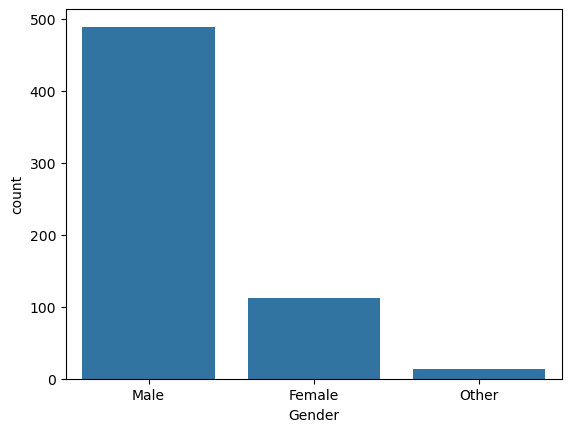

In [31]:
# Based on gender
sns.countplot(x='Gender',data=df)

## Majority on education: Graduate

<Axes: xlabel='Education', ylabel='count'>

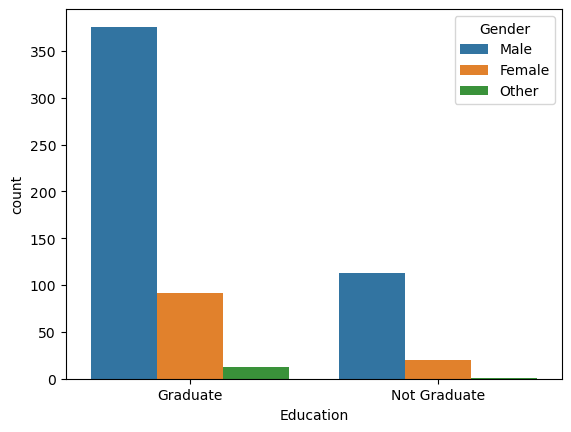

In [32]:
# Based on education level
sns.countplot(x='Education',hue='Gender',data=df)

## Majority on applicant income: <10000

<Axes: ylabel='ApplicantIncome'>

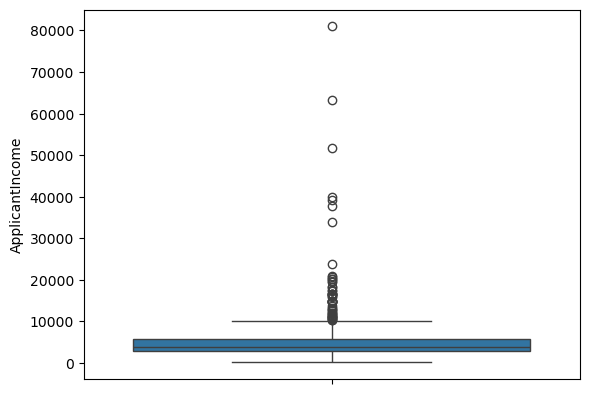

In [33]:
sns.boxplot(df['ApplicantIncome'])

## Tendencies of taking bigger loans: Self employed graduate

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

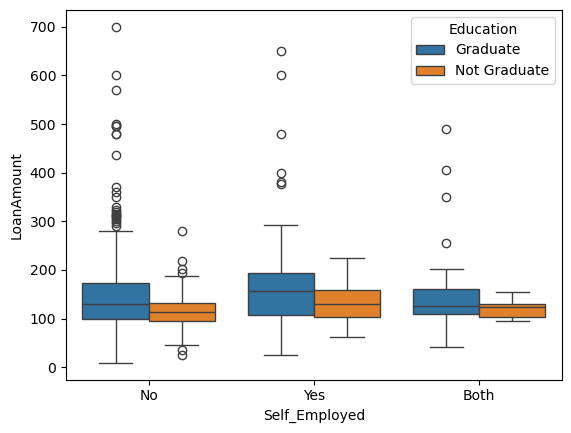

In [34]:
sns.boxplot(x='Self_Employed',y='LoanAmount',hue='Education',data=df)

## Distribution of peoples living regions

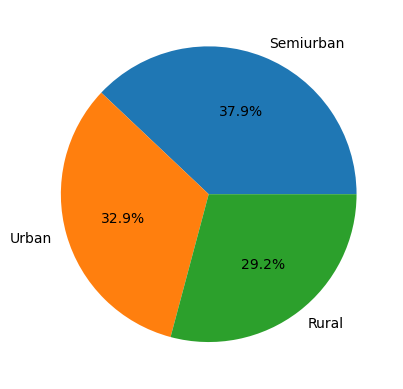

In [35]:
#Distrinution of Peoples living regions
s=df['Property_Area'].value_counts()/df['Property_Area'].value_counts().sum()*100
plt.pie(s.values,labels=s.index,autopct='%1.1f%%')
plt.show()

## Loan Amount mostly increases with CoapplicantIncome

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

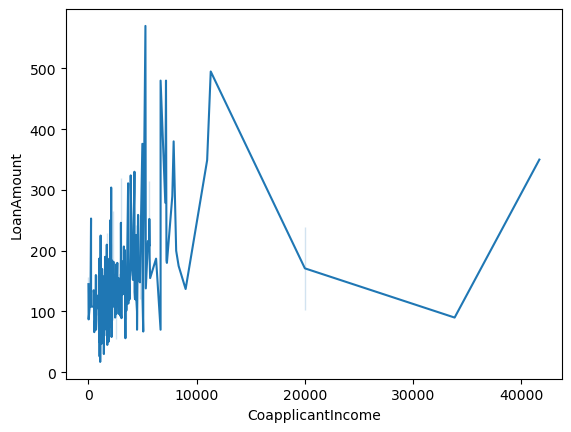

In [36]:
sns.lineplot(x='CoapplicantIncome',y='LoanAmount',data=df)

In [37]:
df.groupby(['Married','Education','Self_Employed','Dependents'])['LoanAmount'].mean()

Married  Education     Self_Employed  Dependents
No       Graduate      Both           0             174.833333
                                      1             104.000000
                                      2             120.000000
                                      3+            350.000000
                       No             0             104.500000
                                      0             125.564815
                                      1             120.545455
                                      2             128.428571
                                      3+            253.333333
                       Yes            0             163.764706
                                      1             128.000000
                                      3+            292.000000
         Not Graduate  Both           0             123.000000
                                      1             132.000000
                       No             0              94.137931
      

# **2. Data preprocessing**

In [38]:
# reading dataset
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [39]:
print (train.shape, test.shape)

(614, 13) (367, 12)


In [40]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Filling up NAN values of Gender and Converting categorial variables(Male,Female) to numerical variables(0,1)

In [42]:
train.Gender = train.Gender.fillna(train.Gender.mode())
test.Gender = test.Gender.fillna(test.Gender.mode())

sex = pd.get_dummies(train['Gender'] , drop_first = True )
train.drop(['Gender'], axis = 1 , inplace =True)
train = pd.concat([train , sex ] , axis = 1)

sex = pd.get_dummies(test['Gender'] , drop_first = True )
test.drop(['Gender'], axis = 1 , inplace =True)
test = pd.concat([test , sex ] , axis = 1)

## Filling up NAN values of Dependents and Converting categorial variables(1,2,3+) to numerical variables(1,2,3)¶


In [43]:
train.Dependents = train.Dependents.fillna("0")
test.Dependents = test.Dependents.fillna("0")

rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(rpl).astype(int)
test.Dependents = test.Dependents.replace(rpl).astype(int)

## Filling up NAN values of Credit history by taking the mode

In [44]:
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History  = test.Credit_History.fillna(test.Credit_History.mode()[0])

## Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)¶


In [45]:
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode())
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode())

self_Employed = pd.get_dummies(train['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
train.drop(['Self_Employed'], axis = 1 , inplace =True)
train = pd.concat([train , self_Employed ] , axis = 1)

self_Employed = pd.get_dummies(test['Self_Employed'] , prefix = 'employed' ,drop_first = True )
test.drop(['Self_Employed'], axis = 1 , inplace =True)
test = pd.concat([test , self_Employed ] , axis = 1)

## Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)

In [46]:
train.Married = train.Married.fillna(train.Married.mode())
test.Married = test.Married.fillna(test.Married.mode())

married = pd.get_dummies(train['Married'] , prefix = 'married',drop_first = True )
train.drop(['Married'], axis = 1 , inplace =True)
train = pd.concat([train , married ] , axis = 1)

married = pd.get_dummies(test['Married'] , prefix = 'married', drop_first = True )
test.drop(['Married'], axis = 1 , inplace =True)
test = pd.concat([test , married ] , axis = 1)

## Filling up NAN values of Loan Amount Term

In [47]:
train.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
test.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean()).astype(int)
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean()).astype(int)

<Axes: xlabel='LoanAmount', ylabel='Density'>

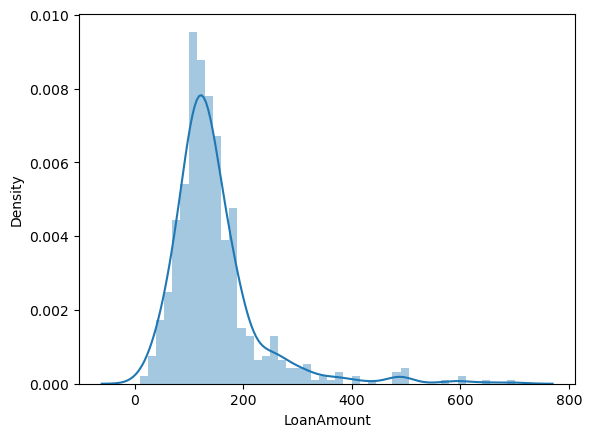

In [48]:
sns.distplot(train['LoanAmount'])

## Converting categorial variables to numerical variables

In [49]:
train['Education'] = train['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)
test['Education'] = test['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

## Converting categorial variables to numerical variables

In [50]:
train['Property_Area'] = train['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

test.Property_Area = test.Property_Area.fillna(test.Property_Area.mode())
test['Property_Area'] = test['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

## Target Variable : Loan Status (Converting categorial variables to numerical variables)

In [51]:
train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)

## Dropping the ID column

In [52]:
train.drop(['Loan_ID'], axis = 1 , inplace =True)

In [53]:
train.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,employed_Yes,married_Yes
0,0,0,5849,0.0,146,1.0,0,1,True,False,False
1,1,0,4583,1508.0,128,1.0,2,0,True,False,True
2,0,0,3000,0.0,66,1.0,0,1,True,True,True
3,0,1,2583,2358.0,120,1.0,0,1,True,False,True
4,0,0,6000,0.0,141,1.0,0,1,True,False,False


In [54]:
test.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,LP001015,0,0,5720,0,110,1.0,0,True,False,True
1,LP001022,1,0,3076,1500,126,1.0,0,True,False,True
2,LP001031,2,0,5000,1800,208,1.0,0,True,False,True
3,LP001035,2,0,2340,2546,100,1.0,0,True,False,True
4,LP001051,0,1,3276,0,78,1.0,0,True,False,False


# **3. Modeling**

In [55]:
X = train.drop('Loan_Status' , axis = 1 )
y = train['Loan_Status']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

## **i) Naive Bayes**

In [56]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

82.16216216216216

## ii) **SVM**

In [57]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

70.27027027027027

## **iii) Random Forest**

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test , rf_predictions)*100
acc_rf

83.24324324324324

## **iv) KNN**

In [59]:
from sklearn.neighbors import KNeighborsClassifier
k = 5 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
acc_knn = accuracy_score(y_test, y_pred) * 100
acc_knn

64.32432432432432

## **v) logistic regression**

In [60]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if needed
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
acc_log = accuracy_score(y_test, y_pred) * 100
acc_log

83.24324324324324

## **Hyper parameter tuning**

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_rf.fit(X_train, y_train)
best_rf_model = grid_rf.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [62]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Naive Bayes' , 'SVM', 'Random forest', 'knn', 'logistic regression'],
    'Score': [acc_gb ,acc_svm, acc_rf, acc_knn, acc_log]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random forest,83.243243
4,logistic regression,83.243243
0,Naive Bayes,82.162162
1,SVM,70.270270
3,knn,64.324324


****